In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\cardata.csv")

In [7]:
print(dataset.head())
print(dataset.info())
print(dataset.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [9]:
print("\nMissing values in each column:")
print(dataset.isnull().sum())


Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [11]:
print("Column names in the dataset:", dataset.columns)

Column names in the dataset: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


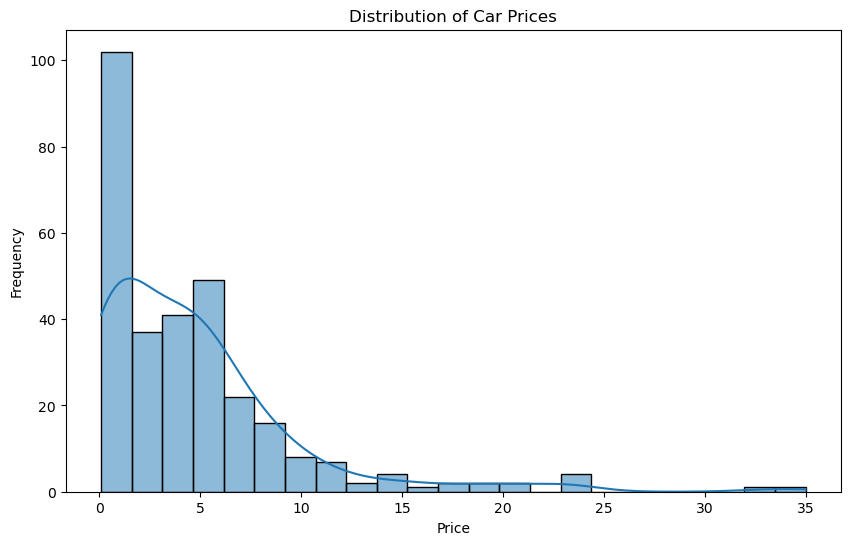

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

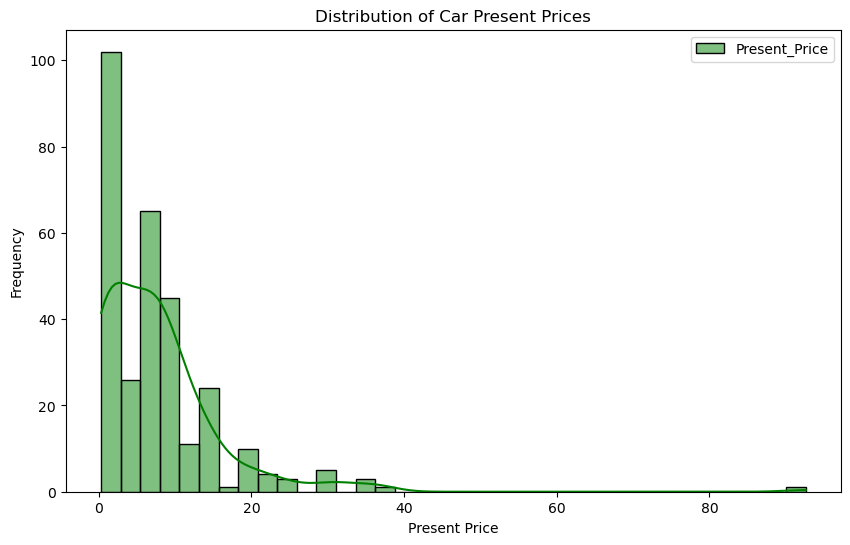

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Present_Price'], kde=True, color="green", label="Present_Price")
plt.title('Distribution of Car Present Prices')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
dataset = pd.get_dummies(dataset, drop_first=True)
print("Data types of columns after encoding:")
print(dataset.dtypes)

Data types of columns after encoding:
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
                            ...   
Car_Name_xcent                bool
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
Length: 106, dtype: object


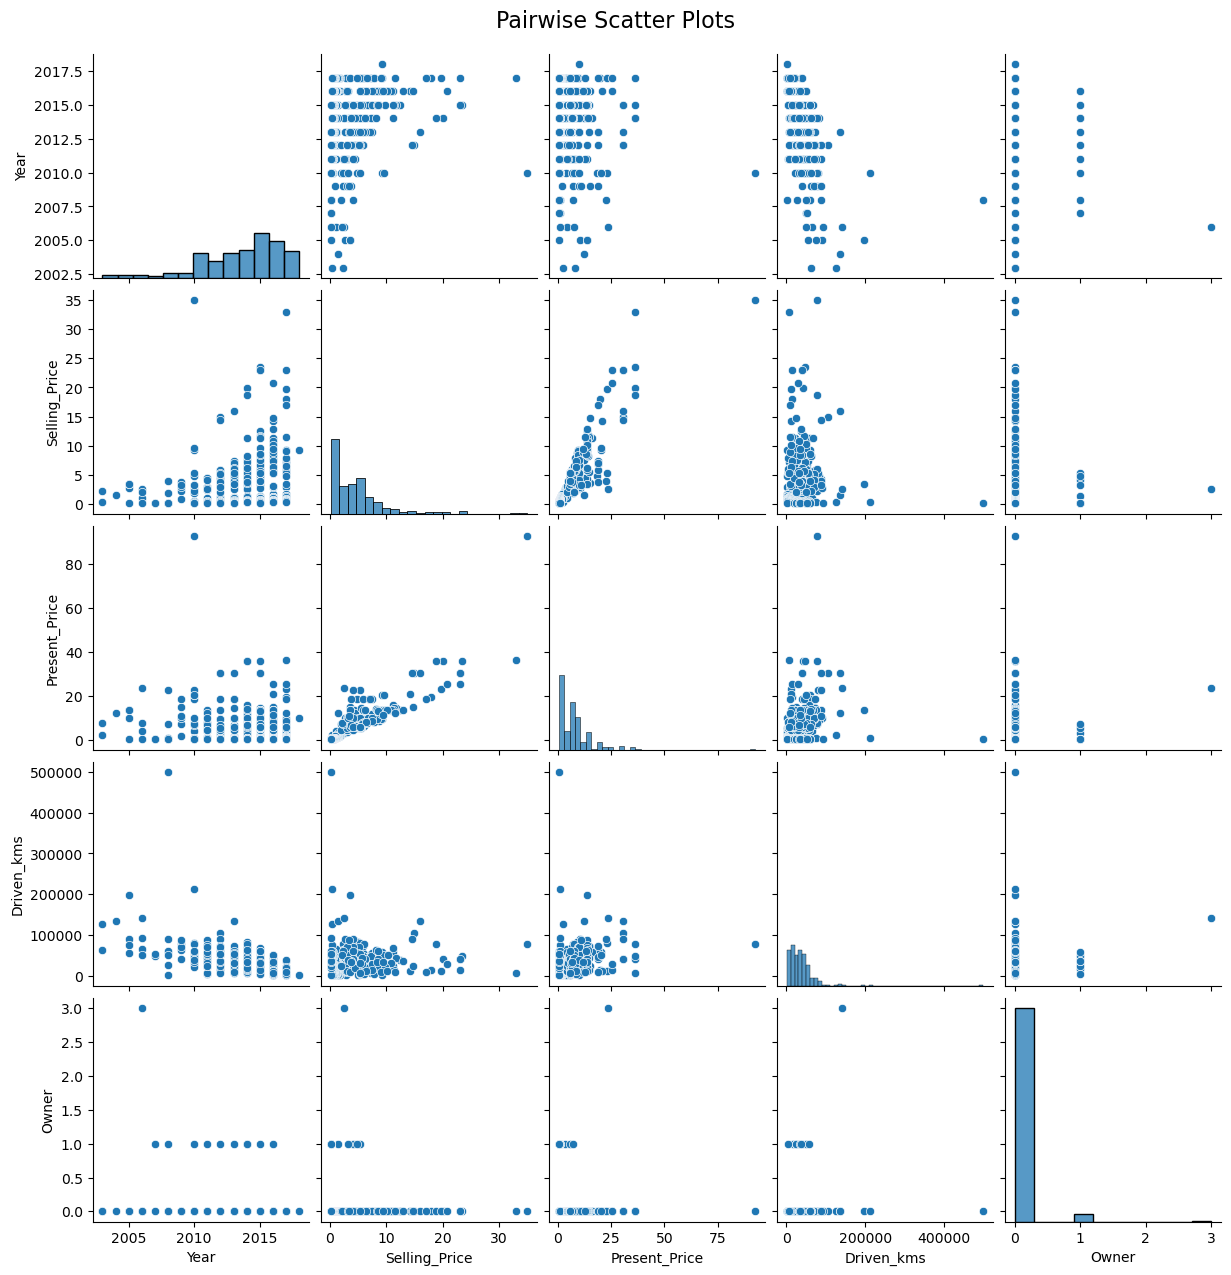

In [21]:
subset = dataset.iloc[:, :5]
sns.pairplot(subset)
plt.suptitle('Pairwise Scatter Plots', fontsize=16, y=1.02)
plt.show()

In [23]:
dataset = dataset.drop(['ID'], axis=1, errors='ignore')
label_encoder = LabelEncoder()
if 'brand' in dataset.columns:
    dataset['brand'] = label_encder.fit_transform(dataset['brand'])
if 'model' in dataset.columns:
    dataset['model'] = label_encoder.fit_transform(dataset['model'])

In [25]:
dataset.fillna(dataset.median(), inplace=True)

In [27]:
X = dataset.drop('Selling_Price', axis=1)
y = dataset['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.6009032786885249
Mean Squared Error (MSE): 0.7789256355737707
Root Mean Squared Error (RMSE): 0.8825676379597037
R-squared (R2): 0.9661859834775334


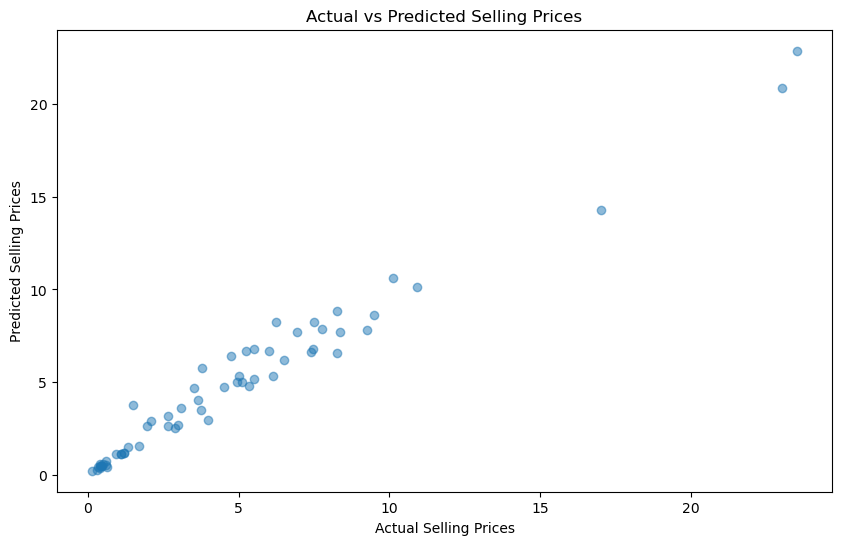

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initializing the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Generating predictions on the test set
y_pred = model.predict(X_test)

# Calculating Evaluation Metrics after predicting
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Ploting Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.show()



Linear Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 665185751950.9247
Mean Squared Error (MSE): 5.137999399910305e+24
Root Mean Squared Error (RMSE): 2266715553374.5967
R-squared (R2): -2.2304619165989224e+23


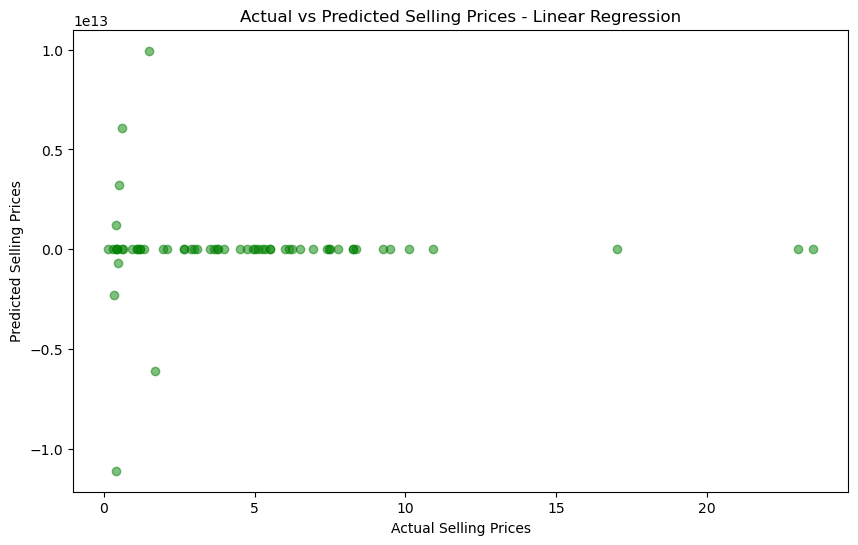

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5,color='green')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices - Linear Regression')
plt.show()

Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 665185751950.9247
Mean Squared Error (MSE): 5.137999399910305e+24
Root Mean Squared Error (RMSE): 2266715553374.5967
R-squared (R2): -2.2304619165989224e+23

Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.6009032786885249
Mean Squared Error (MSE): 0.7789256355737707
Root Mean Squared Error (RMSE): 0.8825676379597037
R-squared (R2): 0.9661859834775334

Best Model: Random Forest Regression


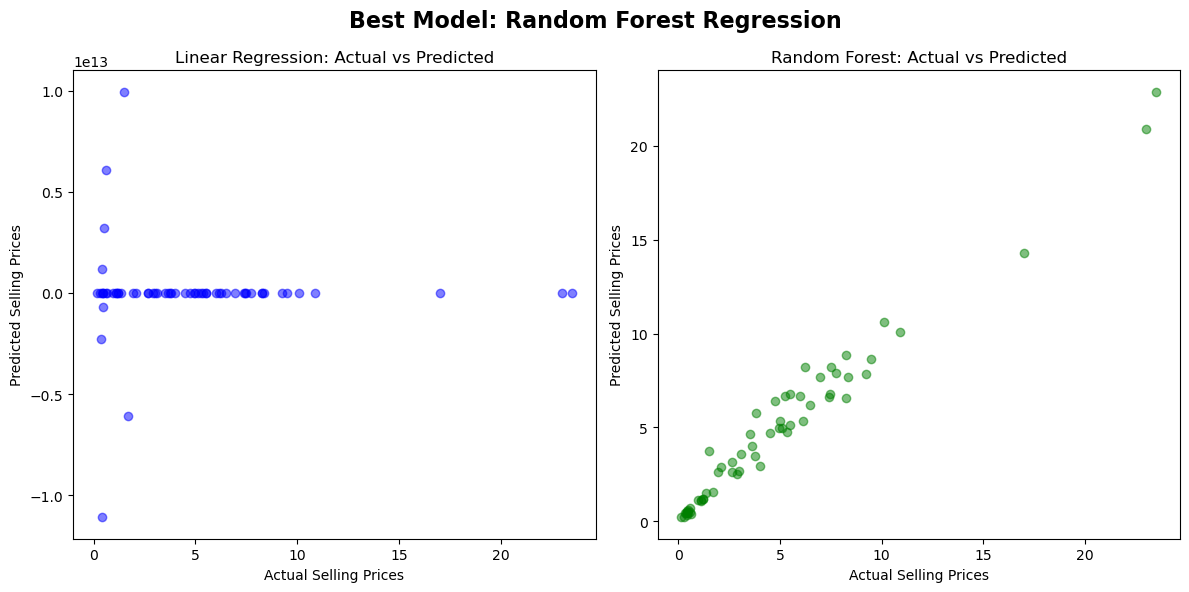

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for both models
print("Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R-squared (R2): {r2_lr}")

print("\nRandom Forest Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2): {r2_rf}")

# Determine the best model based on evaluation metrics
if r2_rf > r2_lr and mse_rf < mse_lr:
    best_model = "Random Forest Regression"
else:
    best_model = "Linear Regression"

# Print the best model
print(f"\nBest Model: {best_model}")

# Visualization: Actual vs Predicted Selling Prices for both models
plt.figure(figsize=(12, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Linear Regression: Actual vs Predicted')

# Scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Random Forest: Actual vs Predicted')


plt.suptitle(f'Best Model: {best_model}', fontsize=16, fontweight='bold')

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nCross-validation MSE for Linear Regression: ", -cv_scores_lr.mean())
print("Cross-validation MSE for Random Forest: ", -cv_scores_rf.mean())


Cross-validation MSE for Linear Regression:  3.330503513588491e+29
Cross-validation MSE for Random Forest:  2.8938292665


In [41]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
print("\nModel Saved Successfully!")


Model Saved Successfully!
